$
{\Large 1.6\ Matplotlib}
$

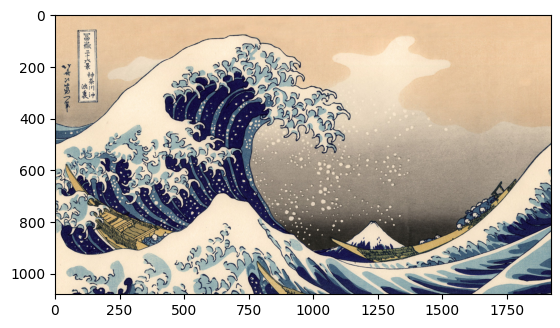

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread("kh.jpg")
plt.imshow(img)

$
{\Large 2.3\ パーセプトロンの実装}
$

$
{ANDゲートの実装}
$

In [3]:
import numpy as np
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) +b
    if tmp <= 0:
        return 0
    else:
        return 1

$
{NANDゲートとORゲートの実装}
$

In [7]:
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) +b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) +b
    if tmp <= 0:
        return 0
    else:
        return 1



$
{XORゲートの実装}
$

| x1  | x2   | y   |
|-------|-------|-------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [10]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


In [11]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [1]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

$
{\Large 3.1\ パーセプトロンからニューラルネットワークへ}
$

$
\large Activation Functionの実装
$

$
Step\ function
$

In [12]:
import numpy as np
def step_function(x):
    y = x >0
    return y.astype(int)

x = np.arange(-5,5,1)

step_function(x)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

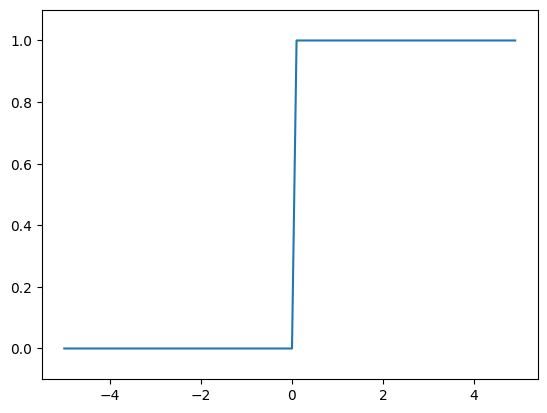

In [14]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()



$
Sigmoid\ function
$

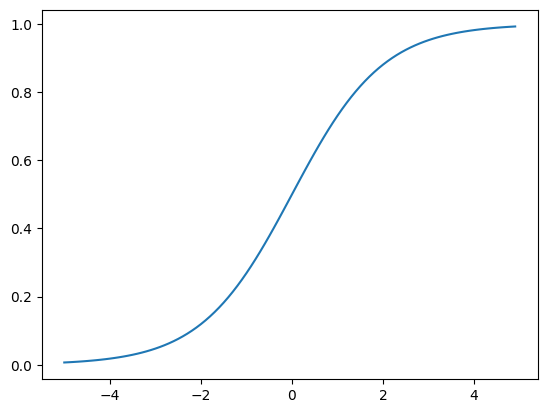

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()


$ReLU\ function$

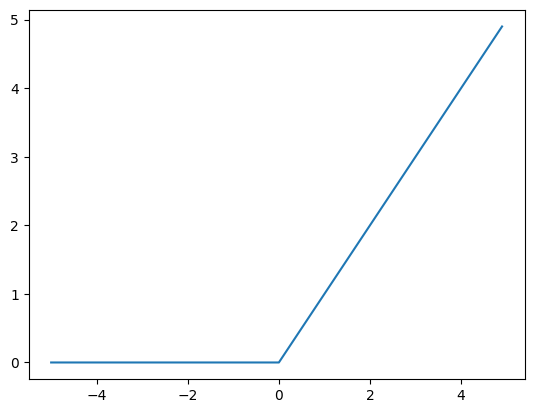

In [25]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.show()

In [17]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

np.ndim(A)
A.shape
A.shape[0]

[1 2 3 4]


4

In [20]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

np.ndim(B)

B.shape


[[1 2]
 [3 4]
 [5 6]]


(3, 2)

In [21]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

A.dot(B)

array([[19, 22],
       [43, 50]])

In [23]:
x = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
print(W)
y = x.dot(W)
print(y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


In [2]:
import numpy as np
def imit_network():
    network = {}
    network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['w3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = x.dot(w1) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(w2) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(w3) + b3
    y = a3 # Identity function
    
    return y

network = imit_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y) 

NameError: name 'sigmoid' is not defined

$
\Large Softmax\ function
$

$$
\large y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$

In [30]:
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

sum_y = np.sum(y)
print(sum_y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0


In [32]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

$
To\ prevent\ overflow 
$


In [37]:
a = np.array([1010,1000,990])
c = np.max(a)
y = np.exp(a-c) / np.sum(np.exp(a-c))
print(y)
print(np.sum(y))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


In [38]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [1]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image
import numpy as np
import pickle

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


$
\large Implement\ Nueral\ network\ for\ MNIST
$

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [7]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1


print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

$
\Large 4章\ ニューラルネットワークの学習
$

$$
\large 二乗和誤差
$$
$$
E = \frac{1}{2}\sum_{k}(y_k-t_k)^2
$$

$$
y_kがニューラルネットワークの出力、t_kがラベル
$$
$$
t_kはone-hot表現 (正解が1それ以外は0)
$$

In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum(y-t)**2

$$
\large 交差エントロピー誤差
$$

$$
E = -\sum_{k}t_k\log{y_k}
$$

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7 # log0を防ぐための微小な値
    return -np.sum(t*np.log(y+delta))

$$
\large N個の訓練データのクロスエントロピー誤差の和
$$

$$
E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}
$$

$$
Nで割っているので、1っ個当たりの平均の損失関数
$$

In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


(60000, 784)
(60000, 10)


$$
\large バッチを取り出す
$$

In [5]:
train_size = x_train.shape[0]
batch_size = 10
size = (train_size, batch_size)
batch_mask = np.random.choice(size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

$$
\large バッチ対応エントロピー誤差
$$

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(y*np.log(t+1e-7)) / batch_size

$$
\large 微分
$$

$$
\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x + h) - f(x)}{h}

In [7]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

# 数値微分 

$
\Large 5章\ 誤差逆伝搬法
$


$$
\large 合成関数
$$

$$
z = t^2\\
t = x + y
$$

$$
\large Chain\ rule
$$

$$
\frac{\partial{z}}{\partial{x}}=
\frac{\partial{z}}{\partial{t}}\frac{\partial{t}}{\partial{x}}
$$

$
Practice\ for\ class\ method
$

In [11]:
class myclass:
    def __init__(self, x):
        self.x = x
        
    def myfunc(self):
        return self.x**2
    
    def myfunc2(self):
        return 2*self.x
    
    def myfunc3(self):
        return 3*self.x**2
    
    
my = myclass(2)
print(my.myfunc3())    

12


In [12]:
class ParentClass:
    def parent_method(self):
        return "This is a method from the parent class"

class ChildClass(ParentClass):
    def child_method(self):
        return "This is a method from the child class"

# インスタンスの作成
child_instance = ChildClass()

# 親クラスのメソッドを呼び出す
print(child_instance.parent_method())

# 子クラスのメソッドを呼び出す
print(child_instance.child_method())

This is a method from the parent class
This is a method from the child class


$
Implement\ the\ layer
$

In [13]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy   

In [14]:
apple = 100
apple_num = 2
tax = 1.1

# Layer
mul_apple_Layer = MulLayer()
mul_tax_Layer = MulLayer()

# forward
apple_price = mul_apple_Layer.forward(apple, apple_num)
price = mul_tax_Layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [16]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_Layer.backward(dprice)
dapple, dapple_num = mul_apple_Layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


$
Implement\ add\ layer
$

In [17]:
class addLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        
        return dx, dy

$
Implement\ activate\ function\ layer
$

In [24]:
# ReLu layer
import numpy as np

class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

In [31]:
y = np.array([[1.0, -0.5], [-2.0, 3.0]])
mask = Relu()
print(mask.forward(y))

[[1. 0.]
 [0. 3.]]


$
Implemet\ Sigmoid\ layer
$

In [32]:
class sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

In [51]:
X = np.random.rand(2)
W = np.random.rand(2,3)
XW = X.dot(W)
print(XW)
B = np.random.rand(3)
Y = XW + B
print(Y)

[0.09423102 0.49117945 0.50537407]
[0.14272743 1.26158417 0.93464866]


$
Implement\ Affine\ layer
$

In [52]:
class Affine:
    def __init__self(self, W, b):
        self.W = W
        self.b = B
        self.x = None
        self.dw = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

$
Implement\ Softmax
$

In [55]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(y*np.log(t+1e-7)) / batch_size


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.Y = None
        self.T = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

$
\large Implement\ Two\ layer\ network
$

In [56]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
        self.layers["Relu1"] = Relu()
        self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])
        
        self.lastlayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return self.lastlayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        accuracy = np.sm(y == t) / float(x.shape[0])
        return accuracy
    
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, y)
        
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads
    
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        
        # backward
        dout = 1
        dout = self.lastlayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # 設定
        grads = {}
        grads["W1"] = self.layers["Affine1"].dW
        grads["b1"] = self.layers["Affine1"].db
        grads["W2"] = self.layers["Affine2"].dW
        grads["b2"] = self.layers["Affine2"].db
        
        return grads
                  

In [57]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

ModuleNotFoundError: No module named 'two_layer_net'